### Python
<div class="text-justify">Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными.
DataFrame должен состоять из 10000 строк и 5 колонок.
Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:

- 1-я колонка – user_id – идентификатор пользователя. Длина user_id должна равняться 15-ти
символам. Идентификатор состоит из случайной комбинации следующих символов:
"1234567890abcdefghijk". Для каждой строки в DataFrame значение user_id формируются
случайным образом.
- 2-я колонка – order_number – номер заказа. Столбец необходимо заполнить случайными
значениями в диапазоне от 1 до 10.
- 3-я колонка – click2delivery – время, прошедшее с момента оформления заказа до вручения
клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения
со средним 1440 и стандартным отклонением 200.
- 4-я колонка – order_items_sum – общая стоимость заказа. Значения для этого столбца необходимо
взять из экспоненциального распределения с параметром λ = 1, смещённого на +1.
- 5-я колонка – retention – день жизни покупателя, в который он совершил заказ. Необходимо
сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15 и 0.05 соответственно.\
    
В случае, если в колонке user_id встречаются дублирующиеся значения, оставь только первое из
них.</div>

In [60]:
# Импорт необходимых библиотек

import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
def get_user_id():
    # Создания списка из 10000 айди и помещение его в датафрейм
    
    user_id_list = []
    symbol = '1234567890abcdefghijk'
    for i in range(10000):
        user_id = str()
        for i in range(0, 15, 1):
            el = random.randint(0, len(symbol) - 1)
            user_id = user_id + str((symbol[el]))
        user_id_list.append(user_id)
    df = pd.DataFrame(user_id_list, columns=['user_id'])
    return df

df = get_user_id()

In [62]:
# Условие для проверки кол-ва уникальных user_id

if df.user_id.nunique() < 10000:
    df.drop_duplicates(keep='first', inplace=True)
    print(df.user_id.nunique())
else:
    print(True)

True


In [63]:
# Создание оставшихся столбцов при помощи библиотеки random

df['order_number'] = df.apply(lambda x: random.randint(1, 10), axis=1)
df['click2delivery'] = df.apply(lambda x: round(random.normalvariate(mu=1440, sigma=200), 2), axis=1)
df['order_items_sum'] = df.apply(lambda x: round(random.expovariate(lambd=1) + 1, 2), axis=1)
df['retention'] = df.apply(lambda x: random.choices([1, 2, 3, 4, 5],\
                                                    weights=[0.35, 0.25, 0.20, 0.15, 0.05])[0], axis=1)

In [64]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention
0,gddba5eae6acfdj,4,1656.58,1.03,4
1,4j13jaagijgcjbd,8,1179.45,1.10,1
2,hfe10i9634aj4f2,9,1501.31,1.06,5
3,a0hhji4a26i96ea,3,1478.67,1.85,3
4,i63dhg86b7ddek3,10,1521.69,1.98,2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          10000 non-null  object 
 1   order_number     10000 non-null  int64  
 2   click2delivery   10000 non-null  float64
 3   order_items_sum  10000 non-null  float64
 4   retention        10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


### Задача:
<div class="text-justify">


- Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение
времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.
- Отдельной колонкой добавить значения последовательности, начинающейся с 0,1, где каждый
следующий элемент является суммой двух предыдущих, умноженных на 0.5
- Напиши функцию, которая принимает на вход значение user_id и возвращает строку следующего
вида: все буквы в той последовательности, в которой они встречаются в user_id, затем квадрат
числа, полученного из всех цифр в user_id в той последовательности, в которой они встречаются в
user_id.
- Добавь результат применения этой функции к user_id в новый столбец. 
- Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов
click2delivery, order_items_sum и retention. Построй гистограммы распределения значений в
столбцах
- Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки
заказа от его номера. Обоснуй, почему ты так считаешь?</div>

In [66]:
# Посчитаем среднее значение времени доставки с группировкой по номеру заказа,
# затем подставим ср. значение в датафрейм согласно номарам заказов

time_delivery = df.groupby(by='order_number')\
                      .agg('mean')[['click2delivery']]\
                      .to_dict()['click2delivery']
def get_mean_time(order_number):
    for k, v in time_delivery.items():
        if order_number == k:
            return round(v, 2)

df['order_avg_delivery'] = df.order_number.apply(lambda x: get_mean_time(x))

In [67]:
# Создание списка расчитанных значений, начинающихся с 0,1 и добавление его в качестве столбца в датафрейм

def add_value():
    value_list = []
    for i in range(len(df)):
        if i == 0:
            value_list.append(0.1)
        elif i == 1:
            value_list.append(0.1 * 0.5)
        else:
            value = (value_list[i-1] + value_list[i-2]) * 0.5
            value_list.append(value)
    df['value'] = value_list
    
add_value()

In [68]:
# Преобразование user_id согласно условию задания и применение функции к датафрейму

def transform_id(user_id):
    litter = str().join(re.findall(r'[a-zA-Z]', user_id))
    number = str().join(re.findall(r'[0-9]', user_id))
    if number.isdigit() == True:
        num = int(number) ** 2
        new_id = litter + str(num)
    else:
        new_id = litter
    return new_id

df['new_id'] = df.user_id.apply(lambda x: transform_id(x))

In [69]:
# Расчет показателей для столбцов click2delivery, order_items_sum и retention

df[['click2delivery','order_items_sum', 'retention']].agg(['count', 'median', 'mean', 'var', 'std'])

,click2delivery,order_items_sum,retention
count,10000.000000,10000.000000,10000.000000
median,1443.230000,1.680000,2.000000
mean,1441.005370,1.983722,2.326000
var,40935.907089,0.973459,1.536078
std,202.326239,0.986640,1.239386


In [71]:
df[['click2delivery', 'order_items_sum', 'retention']].agg(['mode'])

,click2delivery,order_items_sum,retention
,mode,mode,mode
0,1288.32,1.06,1


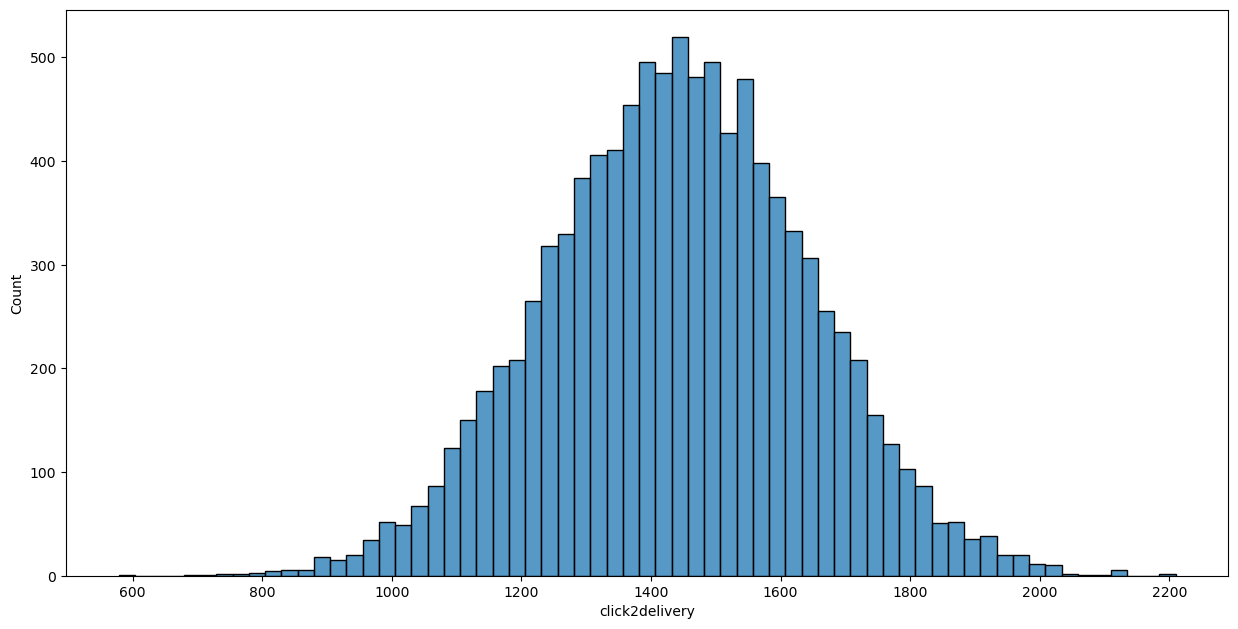

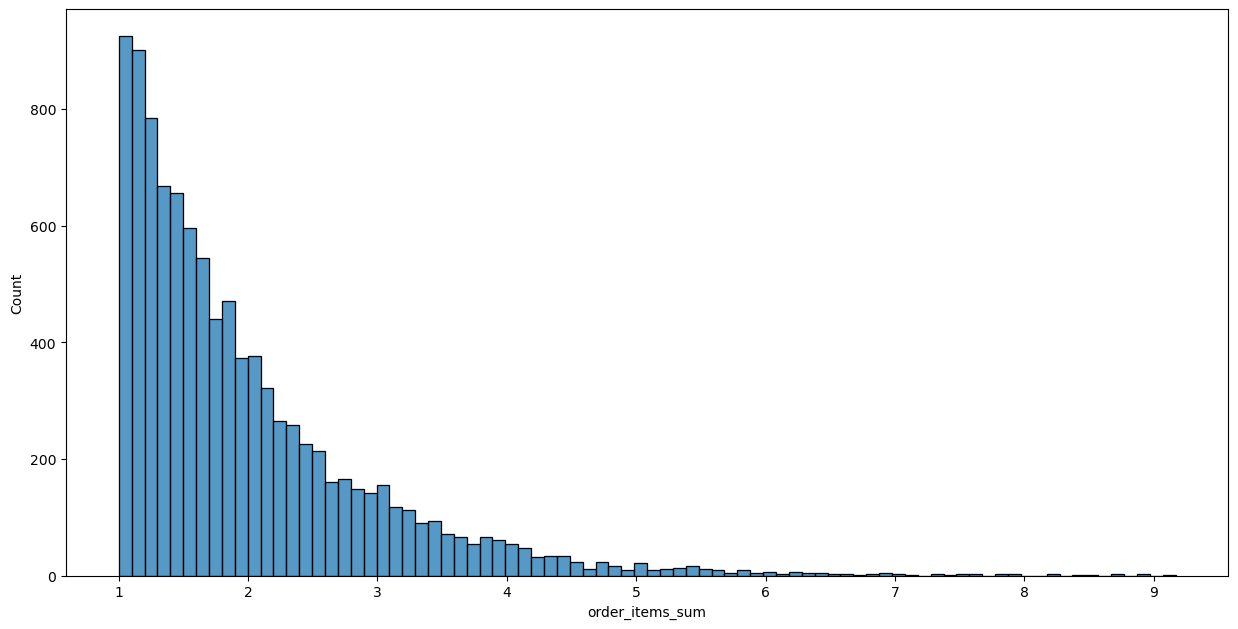

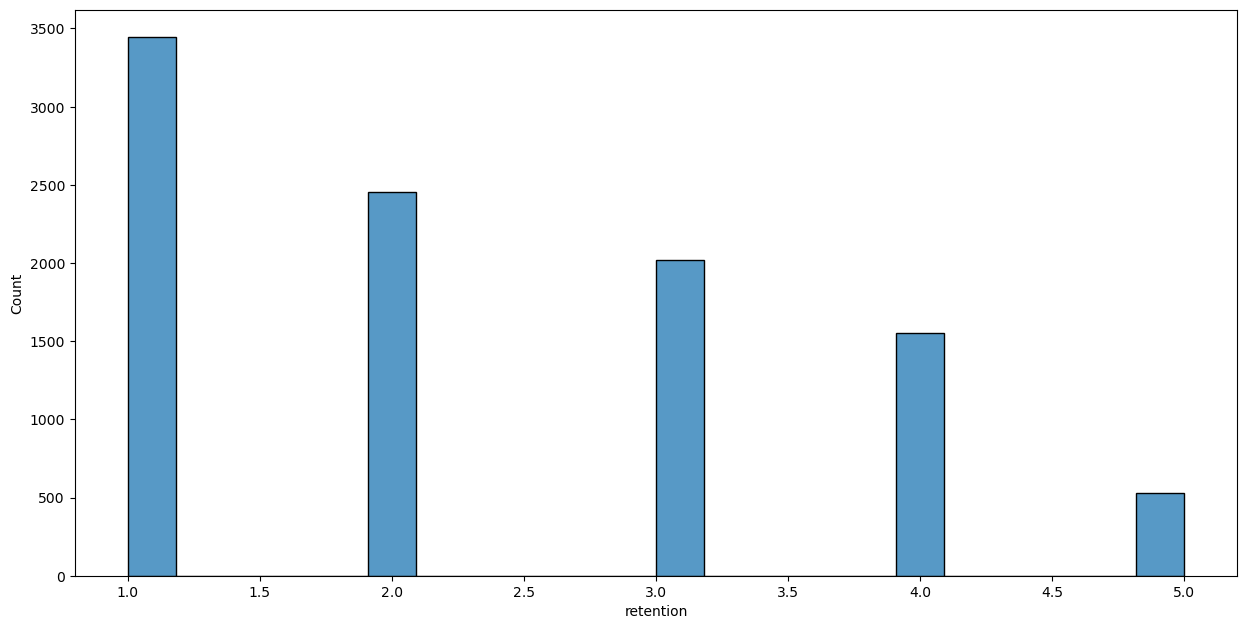

In [74]:
index = 1

for i in ['click2delivery','order_items_sum', 'retention']:
    plt.figure(figsize=(15, 25))
    plt.subplot(3, 1, index)
    sns.histplot(data=df, x=i)
    plt.show()
    index += 1


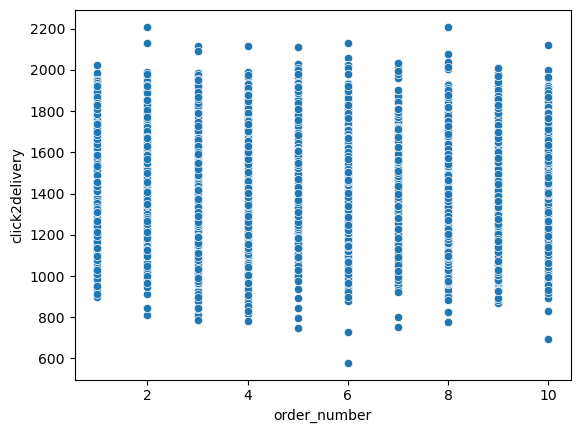

In [73]:
# График рассеивания для времени доставки и номера заказа

sns.scatterplot(x=df.order_number, y=df.click2delivery)
plt.show()

В целом видно, что вне зависимости от номера заказа, время доставки распределенно более-менее равномерно на диапозоне от 800 до 2100 для всех номеров. Данный вывод законемерный, учитывая то, что время доставки это значения, взятые из нормального распределения, а номер заказа - случайное число от 1 до 10. Также это можно увидеть на частотном графике с разбиением по номеру заказа. А для более точных выводов, можно расчитать по-парные t-test.